<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = pd.read_csv('drive/MyDrive/AI/titanic_modified_dataset.csv') 
dataset = iris.to_numpy().astype(np.float64)
idx = np.arange(dataset.shape[0])
np.random.shuffle(idx)

dataset = dataset[idx]

X, y = dataset[:, :-1], dataset[:, -1]

intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)
m = X.shape[0]

print('X_b', X_b.shape)
print('y', y.shape)
print('m', m)

X_b (891, 10)
y (891,)
m 891


In [10]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(y_h, y):
    return (-y * np.log(y_h) - (1 - y) * np.log(1 - y_h))

def predict(X, theta):    
    y_hat = sigmoid_function(np.dot(X, theta))
    return y_hat

In [11]:
# training
lr = 0.01
num_iter = 100
minibatch_size = 32

theta = np.random.uniform(-1, 1, X_b.shape[1])

losses = []
accs   = []

for i in range(num_iter):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled     = X_b[shuffled_indices]
    y_shuffled       = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
    
        # compute output
      
        z = np.dot(xi, theta.T)
        
        y_hat = sigmoid_function(z)
        
        # compute loss
        loss = loss_function(y_hat, yi)
       

        # compute gradient
        gradient = np.dot(xi.T, (y_hat - yi)) / yi.size

        # update
        theta -= lr*gradient 

        
        # ===========================
        # loss
        losses.append(loss)

        # accuracy
        preds = predict(xi, theta).round()
        acc = (preds == yi).mean()
        accs.append(acc)
# print(y.shape)

<ipython-input-10-2dcdcfebfdfb>:5: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(y_h) - (1 - y) * np.log(1 - y_h))
<ipython-input-10-2dcdcfebfdfb>:5: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(y_h) - (1 - y) * np.log(1 - y_h))
<ipython-input-10-2dcdcfebfdfb>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: ignored

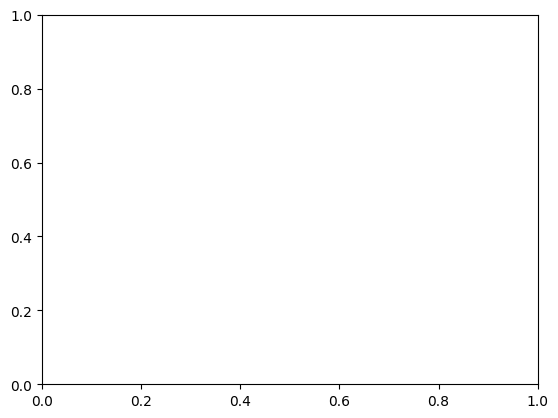

In [12]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

<ipython-input-92-f5f6d76511bf>:8: RuntimeWarning: divide by zero encountered in log
  return (-y*np.log(y_h) - (1-y)*np.log(1-y_h)).mean()
<ipython-input-92-f5f6d76511bf>:8: RuntimeWarning: invalid value encountered in multiply
  return (-y*np.log(y_h) - (1-y)*np.log(1-y_h)).mean()


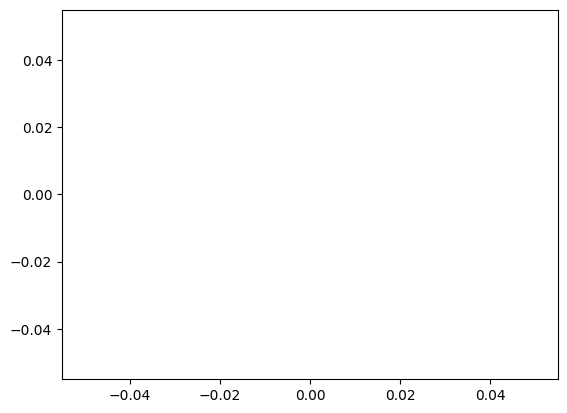